In [ ]:
#Na podstawie poprzedniego pliku stwórz 4 modele:
#1. z warstwą embedding
#2. z warstwą embedding i warstwą SimpleRNN (między embedding a dense), wyposażoną w 32 neurony
#3. z warstwą embedding i warstwą GRU (między embedding a dense), wyposażoną w 32 neurony
#4. z warstwą embedding i warstwą LSTM (między embedding a dense), wyposażoną w 32 neurony
#Dla każdego modelu stwórz wykresy. Która sieć poradziła sobie najlepiej?


gru - składa się z 2 gateów i okresla co (jaki typ informacji np) wchodzi a co wychodzi

lstm - najmodniejsza: ma jeszcze gate pamięci (input zapamietuje, forget określa co jest usuwane, output co wychodzi dalej)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
n_words = 5000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=n_words)

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 1000

#https://keras.io/api/datasets/imdb/

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 100

X_train_pad = pad_sequences(X_train, maxlen=max_words, padding="post")
X_test_pad = pad_sequences(X_test, maxlen=max_words, padding="post")

# 1. z warstwą embedding

In [3]:
from tensorflow.keras.layers import Embedding, Flatten
model = Sequential()
model.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           80000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                102464    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 182529 (713.00 KB)
Trainable params: 182529 (713.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
782/782 [==============================] - 4s 4ms/step - loss: 0.4320 - accuracy: 0.7868 - val_loss: 0.3426 - val_accuracy: 0.8482
Epoc

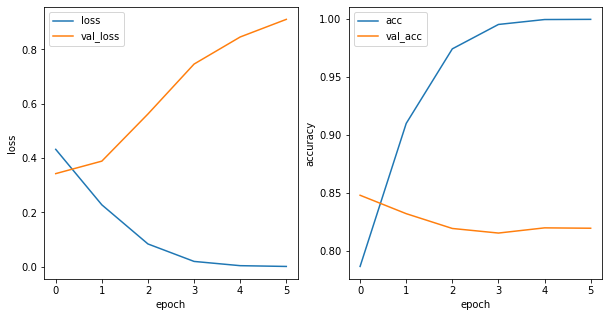

In [4]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "acc")
plt.plot(hist.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

# 2. z warstwą embedding i warstwą SimpleRNN (między embedding a dense), wyposażoną w 32 neurony

In [9]:
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU

In [10]:
from tensorflow.keras.layers import Embedding, Flatten
model = Sequential()
model.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model.add(SimpleRNN(32))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           80000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83745 (327.13 KB)
Trainable params: 83745 (327.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
782

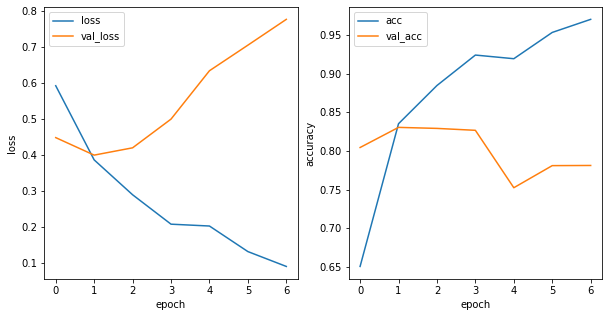

In [11]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "acc")
plt.plot(hist.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

# 3. z warstwą embedding i warstwą GRU (między embedding a dense), wyposażoną w 32 neurony

In [13]:
from tensorflow.keras.layers import Embedding, Flatten
modelGRU = Sequential()
modelGRU.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
modelGRU.add(GRU(32))
modelGRU.add(Flatten())
modelGRU.add(Dense(64, activation='relu'))
modelGRU.add(Dense(1, activation='sigmoid'))
modelGRU.summary()
modelGRU.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
historyGRU = modelGRU.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           80000     
                                                                 
 gru_1 (GRU)                 (None, 32)                4800      
                                                                 
 flatten_3 (Flatten)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 86977 (339.75 KB)
Trainable params: 86977 (339.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
782

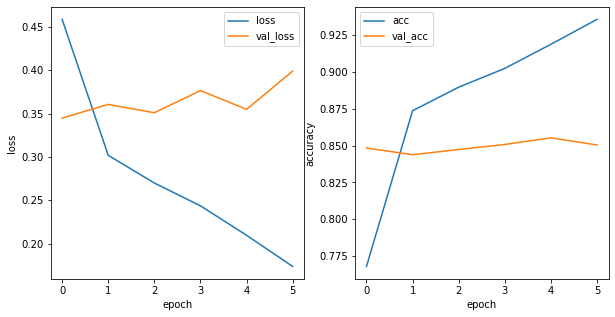

In [14]:
histGRU = pd.DataFrame(historyGRU.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(histGRU.loss, label = "loss")
plt.plot(histGRU.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(histGRU.accuracy, label = "acc")
plt.plot(histGRU.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

# 4. z warstwą embedding i warstwą LSTM (między embedding a dense), wyposażoną w 32 neurony

In [15]:
modelLSTM = Sequential()
modelLSTM.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
modelLSTM.add(LSTM(32))
modelLSTM.add(Flatten())
modelLSTM.add(Dense(64, activation='relu'))
modelLSTM.add(Dense(1, activation='sigmoid'))
modelLSTM.summary()
modelLSTM.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
historyLSTM = modelLSTM.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 16)           80000     
                                                                 
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 flatten_4 (Flatten)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 88449 (345.50 KB)
Trainable params: 88449 (345.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
782

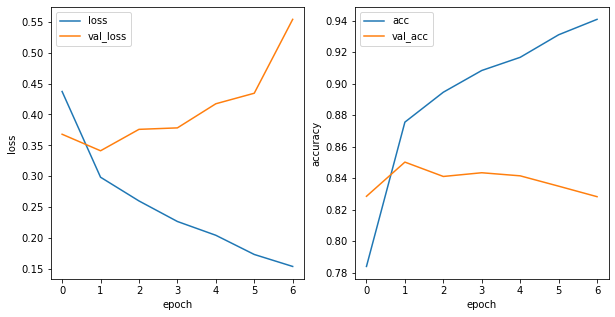

In [16]:
histLSTM = pd.DataFrame(historyLSTM.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(histLSTM.loss, label = "loss")
plt.plot(histLSTM.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(histLSTM.accuracy, label = "acc")
plt.plot(histLSTM.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [ ]:
# = są bardzo przeuczone, najlepiej mi dał radę GRU
# można by dorzucić kolejne warstwy rekurencyjne